In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [63]:
# 각 컬럼들이 조회수와 상관관계가 있는지 알아보자.

In [307]:
df= pd.read_csv('data/KR_youtube_trending_data.csv')

In [65]:
df.head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN


In [ ]:
# 컬럼의 구성

In [308]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [66]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,168554.000000,1.685540e+05,1.685540e+05,168554.000000,1.685540e+05
mean,20.434929,1.721696e+06,7.589840e+04,710.066976,8.771450e+03
std,6.168752,6.609427e+06,4.320735e+05,8729.073814,1.094613e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,19.000000,3.481412e+05,5.916000e+03,0.000000,5.430000e+02
50%,23.000000,6.729765e+05,1.180800e+04,67.000000,1.197000e+03
75%,24.000000,1.347320e+06,2.721975e+04,276.000000,2.786000e+03
max,29.000000,2.963142e+08,1.646425e+07,879358.000000,6.939302e+06


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168554 entries, 0 to 168553
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           168554 non-null  object
 1   title              168554 non-null  object
 2   publishedAt        168554 non-null  object
 3   channelId          168554 non-null  object
 4   channelTitle       168554 non-null  object
 5   categoryId         168554 non-null  int64 
 6   trending_date      168554 non-null  object
 7   tags               168554 non-null  object
 8   view_count         168554 non-null  int64 
 9   likes              168554 non-null  int64 
 10  dislikes           168554 non-null  int64 
 11  comment_count      168554 non-null  int64 
 12  thumbnail_link     168554 non-null  object
 13  comments_disabled  168554 non-null  bool  
 14  ratings_disabled   168554 non-null  bool  
 15  description        164638 non-null  object
dtypes: bool(2), int64(5)

In [68]:
# 데이터 가공, 필요없는 컬럼들은 삭제한다.

In [69]:
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168549,sJLAD7mQzxY,"이렇게 많은게 어디로 들어가?! 면 곱빼기, 밥, 부침개 공짜 중국집에서 고기짬뽕,...",2022-12-01T12:45:06Z,UCysVk8dzvSydsFklSu96HSg,광마니,22,2022-12-13T00:00:00Z,짜장면|짬뽕|고기짬뽕|짬뽕밥|부침개|김치부침개|만두|군만두|탕수육|고기튀김|부먹|찍...,302722,9062,0,390,https://i.ytimg.com/vi/sJLAD7mQzxY/default.jpg,False,False,광마니 채널에서는 광고나 협찬을 일절 받고 있지 않습니다. 너그러운 마음으로 양해 ...
168550,Ezz6HNrI8bQ,이 시기에 여왕벌을 가둬야 꿀벌들이 사는 이유,2022-11-29T10:20:30Z,UCLJNGmEfcuugzEjLyZ6mKKw,프응TV,22,2022-12-13T00:00:00Z,꿀벌|여왕벌|감금|감옥|jail|벌|꿀|말벌|양봉|양봉장|프응,691332,9222,0,565,https://i.ytimg.com/vi/Ezz6HNrI8bQ/default.jpg,False,False,제발 꿀벌이면 겨울산란 하지 맙시다.제꿀겨하인스타: honeybeefather비즈니...
168551,Fg5yNg_pa_g,[MMA2022 | 축하공연] 르세라핌 - THE HYDRA + TRAIL...,2022-11-28T05:28:08Z,UCpBlDSUyOpP1WqWVJxZpGLg,Melon 멜론,24,2022-12-13T00:00:00Z,멜론|melon|MELON|멜론MELON|멜론melon|멜론차트|멜론탑백|멜론TOP100,781071,29528,0,1258,https://i.ytimg.com/vi/Fg5yNg_pa_g/default.jpg,False,False,르세라핌의 카즈하 SOLO + FEARLESS가 포함된 FULL Ver. 무대🎤는멜...
168552,i5EP3L7pTvo,"지코, ‘아무 노래 &새삥’ 축하공연 [제43회 청룡영화상 시상식] | KBS 22...",2022-11-25T13:32:47Z,UCK1sVuXaDvJeNwl9noN5nOA,KBS Entertain,24,2022-12-13T00:00:00Z,김혜수|유연석,4905710,71846,0,3682,https://i.ytimg.com/vi/i5EP3L7pTvo/default.jpg,False,False,"지코, ‘아무 노래 &새삥’ 축하공연#청룡영화상 #2022청룡영화상 #제43회청룡영..."


In [70]:
# 영향이 없을것 같은 컬럼을 삭제한다
# ['video_id', 'channelId','comments_disabled','ratings_disabled','trending_date','thumbnail_link']

In [71]:
df1 =df.drop(['video_id', 'channelId','comments_disabled','ratings_disabled','trending_date','thumbnail_link'],axis=1)

In [72]:
df1

,title,publishedAt,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description
0,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,보겸 BK,24,보겸|bokyem,5947503,53326,105756,139946,NaN
1,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,총몇명,1,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,양팡 YangPang,22,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,NaN
3,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,꽈뚜룹 Quaddurup,24,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,JYP Entertainment,10,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,MelOn http://kko.to/TWyXd7zYjSpotify https://s...
...,...,...,...,...,...,...,...,...,...,...
168549,"이렇게 많은게 어디로 들어가?! 면 곱빼기, 밥, 부침개 공짜 중국집에서 고기짬뽕,...",2022-12-01T12:45:06Z,광마니,22,짜장면|짬뽕|고기짬뽕|짬뽕밥|부침개|김치부침개|만두|군만두|탕수육|고기튀김|부먹|찍...,302722,9062,0,390,광마니 채널에서는 광고나 협찬을 일절 받고 있지 않습니다. 너그러운 마음으로 양해 ...
168550,이 시기에 여왕벌을 가둬야 꿀벌들이 사는 이유,2022-11-29T10:20:30Z,프응TV,22,꿀벌|여왕벌|감금|감옥|jail|벌|꿀|말벌|양봉|양봉장|프응,691332,9222,0,565,제발 꿀벌이면 겨울산란 하지 맙시다.제꿀겨하인스타: honeybeefather비즈니...
168551,[MMA2022 | 축하공연] 르세라핌 - THE HYDRA + TRAIL...,2022-11-28T05:28:08Z,Melon 멜론,24,멜론|melon|MELON|멜론MELON|멜론melon|멜론차트|멜론탑백|멜론TOP100,781071,29528,0,1258,르세라핌의 카즈하 SOLO + FEARLESS가 포함된 FULL Ver. 무대🎤는멜...
168552,"지코, ‘아무 노래 &새삥’ 축하공연 [제43회 청룡영화상 시상식] | KBS 22...",2022-11-25T13:32:47Z,KBS Entertain,24,김혜수|유연석,4905710,71846,0,3682,"지코, ‘아무 노래 &새삥’ 축하공연#청룡영화상 #2022청룡영화상 #제43회청룡영..."


In [73]:
# 좀더 비교하기 수월하기위해 가공을 더 진행한다.
# title에 길이, title 영어사용 여부에 따른 칼럼을 새로만든다.
# tags의 태그수를 구한다.
# publisheAt 올리는 시간대별로


In [74]:
# description을 작성했으면 1 아니면 0으로 한다.

In [75]:
df1['description'].loc[ df1['description'].notna() ,]=1

C:\Users\5-10\AppData\Local\Temp\ipykernel_8596\2806883852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['description'].loc[ df1['description'].notna() ,]=1


In [76]:
df1['description'] = df1['description'].fillna(0)

In [77]:
df1['tags'] = df1['tags'].str.split('|')

In [78]:
df1['tags'].value_counts()

[[None]]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   22635
[파뿌리, 예능, 게임, GAME, 오락, 버라이어티, variety, 웹예능, 플레이]                                                                                                                                                                                                                                                                                                                                                                                                                                                            899
[짤툰, 만

In [ ]:
## 추가사항 태그에 자주 등장하는 키워드 들도 알고싶다.

In [86]:
df1['tag_cnt'] = df1['tags'].str.len()

,title,publishedAt,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,tag_cnt
0,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,보겸 BK,24,"[보겸, bokyem]",5947503,53326,105756,139946,0,2
1,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,총몇명,1,"[총몇명, 재밌는 만화, 부락토스, 루시퍼, 총몇명 프리퀄, 총몇명 스토리]",963384,28244,494,3339,1,6
2,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,양팡 YangPang,22,"[양팡, 양팡유튜브, 팡튜브, 가족시트콤, 양팡가족, 양팡가족시트콤, 양팡언니, 현...",2950885,17974,68898,50688,0,27
3,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,꽈뚜룹 Quaddurup,24,"[꽈뚜룹, 한국여행기, quaddurup, 뚜룹이, korea, southkorea...",1743374,36893,1798,8751,1,12
4,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,JYP Entertainment,10,"[JYP Entertainment, JYP, J.Y.Park, JYPark, 박진영...",3433885,353337,9763,23405,1,13
...,...,...,...,...,...,...,...,...,...,...,...
168549,"이렇게 많은게 어디로 들어가?! 면 곱빼기, 밥, 부침개 공짜 중국집에서 고기짬뽕,...",2022-12-01T12:45:06Z,광마니,22,"[짜장면, 짬뽕, 고기짬뽕, 짬뽕밥, 부침개, 김치부침개, 만두, 군만두, 탕수육,...",302722,9062,0,390,1,41
168550,이 시기에 여왕벌을 가둬야 꿀벌들이 사는 이유,2022-11-29T10:20:30Z,프응TV,22,"[꿀벌, 여왕벌, 감금, 감옥, jail, 벌, 꿀, 말벌, 양봉, 양봉장, 프응]",691332,9222,0,565,1,11
168551,[MMA2022 | 축하공연] 르세라핌 - THE HYDRA + TRAIL...,2022-11-28T05:28:08Z,Melon 멜론,24,"[멜론, melon, MELON, 멜론MELON, 멜론melon, 멜론차트, 멜론탑...",781071,29528,0,1258,1,8
168552,"지코, ‘아무 노래 &새삥’ 축하공연 [제43회 청룡영화상 시상식] | KBS 22...",2022-11-25T13:32:47Z,KBS Entertain,24,"[김혜수, 유연석]",4905710,71846,0,3682,1,2


In [ ]:
# tags 컬럼 데이터의 리스트를 하나의 리스트로 합친다.

In [449]:
col = df1['tags']

In [452]:
col

0                                              [보겸, bokyem]
1                [총몇명, 재밌는 만화, 부락토스, 루시퍼, 총몇명 프리퀄, 총몇명 스토리]
2         [양팡, 양팡유튜브, 팡튜브, 가족시트콤, 양팡가족, 양팡가족시트콤, 양팡언니, 현...
3         [꽈뚜룹, 한국여행기, quaddurup, 뚜룹이, korea, southkorea...
4         [JYP Entertainment, JYP, J.Y.Park, JYPark, 박진영...
                                ...                        
168549    [짜장면, 짬뽕, 고기짬뽕, 짬뽕밥, 부침개, 김치부침개, 만두, 군만두, 탕수육,...
168550       [꿀벌, 여왕벌, 감금, 감옥, jail, 벌, 꿀, 말벌, 양봉, 양봉장, 프응]
168551    [멜론, melon, MELON, 멜론MELON, 멜론melon, 멜론차트, 멜론탑...
168552                                           [김혜수, 유연석]
168553    [아이폰, 아이폰13, 아이폰13 미니, iPhone, iPhone 13 mini,...
Name: tags, Length: 168554, dtype: object

In [457]:
list_of_lists = [list(x) for x in col]

In [458]:
list_of_lists

[['보겸', 'bokyem'],
 ['총몇명', '재밌는 만화', '부락토스', '루시퍼', '총몇명 프리퀄', '총몇명 스토리'],
 ['양팡',
  '양팡유튜브',
  '팡튜브',
  '가족시트콤',
  '양팡가족',
  '양팡가족시트콤',
  '양팡언니',
  '현실남매',
  '현실자매',
  '짬식이',
  '브이로그',
  'VLog',
  '먹방',
  '부산',
  '부산유튜버',
  'Hàn Quốc',
  'Gia đình',
  'Sitcom',
  'Chương trình giải trí',
  'Corea',
  'Familia',
  'Comedia',
  'Entretenimiento',
  'Korea',
  'keluarga',
  'sitkom',
  'ragam hiburan'],
 ['꽈뚜룹',
  '한국여행기',
  'quaddurup',
  '뚜룹이',
  'korea',
  'southkorea',
  'vlog',
  '유학',
  '미국생활',
  '플로리다',
  '브이로그',
  '페이크브이로그'],
 ['JYP Entertainment',
  'JYP',
  'J.Y.Park',
  'JYPark',
  '박진영',
  '선미',
  'SUNMI',
  '구준엽',
  'DJ Koo',
  'When We Disco',
  'When We Disco (Duet with 선미)',
  '듀엣',
  'Duet'],
 ['JYP Entertainment',
  'JYP',
  'ITZY',
  '있지',
  'ITZY Video',
  'ITZY Yeji',
  'ITZY Lia',
  'ITZY Ryujin',
  'ITZY Chaeryeong',
  'ITZY Yuna',
  '있지 예지',
  '있지 리아',
  '있지 류진',
  '있지 채령',
  '있지 유나',
  '예지',
  '리아',
  '류진',
  '채령',
  '유나',
  'Yeji',
  'Lia',
  'Ryujin',
  'Chaer

In [ ]:
# 리스트의 리스트의 요소를 뽑아내서 하나의 리스트로 다시조합한다.
# 어떤 키워드들이 태그가 많이 됬는지 알아보기 위한 사전작업.

In [459]:
flattened_list = [item for sublist in list_of_lists for item in sublist]

In [462]:
import pickle

In [464]:
with open("list.pickle","wb") as f:
    pickle.dump(flattened_list, f)

In [461]:
flattened_list

['보겸',
 'bokyem',
 '총몇명',
 '재밌는 만화',
 '부락토스',
 '루시퍼',
 '총몇명 프리퀄',
 '총몇명 스토리',
 '양팡',
 '양팡유튜브',
 '팡튜브',
 '가족시트콤',
 '양팡가족',
 '양팡가족시트콤',
 '양팡언니',
 '현실남매',
 '현실자매',
 '짬식이',
 '브이로그',
 'VLog',
 '먹방',
 '부산',
 '부산유튜버',
 'Hàn Quốc',
 'Gia đình',
 'Sitcom',
 'Chương trình giải trí',
 'Corea',
 'Familia',
 'Comedia',
 'Entretenimiento',
 'Korea',
 'keluarga',
 'sitkom',
 'ragam hiburan',
 '꽈뚜룹',
 '한국여행기',
 'quaddurup',
 '뚜룹이',
 'korea',
 'southkorea',
 'vlog',
 '유학',
 '미국생활',
 '플로리다',
 '브이로그',
 '페이크브이로그',
 'JYP Entertainment',
 'JYP',
 'J.Y.Park',
 'JYPark',
 '박진영',
 '선미',
 'SUNMI',
 '구준엽',
 'DJ Koo',
 'When We Disco',
 'When We Disco (Duet with 선미)',
 '듀엣',
 'Duet',
 'JYP Entertainment',
 'JYP',
 'ITZY',
 '있지',
 'ITZY Video',
 'ITZY Yeji',
 'ITZY Lia',
 'ITZY Ryujin',
 'ITZY Chaeryeong',
 'ITZY Yuna',
 '있지 예지',
 '있지 리아',
 '있지 류진',
 '있지 채령',
 '있지 유나',
 '예지',
 '리아',
 '류진',
 '채령',
 '유나',
 'Yeji',
 'Lia',
 'Ryujin',
 'Chaeryeong',
 'Yuna',
 'ITZY BEHIND',
 'ITZY VIDEOS',
 'ITZY DEBUT',
 '있지 데뷔',
 'n

In [455]:
'공감' in flattened_list

True

In [456]:
# 인터랙티브한 제작을 위해 유저인풋을 받아 태그의 갯수를 출력.
flattened_list.count("공감")

730

In [96]:
# 어떤 태그들이 인기가 있는지 알기위해 리스트를 컬럼으로 만든뒤 중복개수를 센다. 

In [98]:
tag_series = pd.Series(flattened_list)

In [102]:
# 밸류 카운트를 이용하니 자동으로 내림차순 정렬이 되었다.
tag_series = tag_series.value_counts()

In [103]:
tag_series

[None]       22635
먹방            9849
브이로그          5904
예능            5881
유재석           4938
             ...  
원세훈              1
정진기              1
울산선거             1
시무 7조            1
인플루언서 홍지우        1
Length: 105946, dtype: int64

In [104]:
# 사용자에게 몇개까지 보고싶은지 입력받을것
tag_series.head(10)

[None]     22635
먹방          9849
브이로그        5904
예능          5881
유재석         4938
kpop        4537
mukbang     4373
레전드         4286
아이돌         3839
BTS         3772
dtype: int64

In [105]:
# 인기가 없는 키워드를 보고싶을때 
tag_series.tail(10)

국가예산         1
여가부장관        1
이정옥          1
히포크라테스 선서    1
국정원장         1
원세훈          1
정진기          1
울산선거         1
시무 7조        1
인플루언서 홍지우    1
dtype: int64

In [126]:
# 다음은 카테고리 id의 세부정보이다 어떤 카테고리가 인기가 있는지 알아보기위해
# 숫자와 단어의 매핑을 위해 카테고리id와 카테고리네임을 딕셔너리로 변환
number_to_word = {
    1 :'영화 및 애니메이션',
    2 :'자동차 및 차량',
    10 :'음악',
    15 :'애완 동물 및 동물',
    17 :'스포츠',
    18 :'단편 영화',
    19 :'여행 및 이벤트',
    20 :'게임',
    21 :'비디오 블로깅',
    22 :'사람 및 블로그',
    23 :'코미디',
    24 :'엔터테인먼트',
    25 :'뉴스 및 정치',
    26 :'하우투 및 스타일',
    27 :'교육',
    28 :'과학 및 기술',
    29 :'비영리 및 행동주의',
    30 :'영화',
    31 :'애니메이션/애니메이션',
    32 :'액션/어드벤처',
    33 :'고전',
    34 :'코미디',
    35 :'다큐멘터리',
    36 :'드라마',
    37 :'가족',
    38 :'외국',
    39 :'공포',
    40 :'공상과학/판타지',
    41 :'스릴러',
    42 :'단편',
    43 :'쇼',
    44 :'트레일러'}

In [109]:
df1['categoryId'].value_counts()

24    58711
22    27041
10    18760
17    12782
23    10694
25     7558
26     7248
20     6434
1      5003
15     3255
27     3120
19     3045
28     2727
2      1922
29      254
Name: categoryId, dtype: int64

In [123]:
df1.loc[ :, 'categoryId' ] 

0         24
1          1
2         22
3         24
4         10
          ..
168549    22
168550    22
168551    24
168552    24
168553    28
Name: categoryId, Length: 168554, dtype: int64

In [128]:
# 'map' 함수를 사용하여 사전을 'categoryId' 열에 적용 (매핑)
# 결과 시리즈를 새 'categori_name' 열에 저장
df1['categori_name'] = df1['categoryId'].map(number_to_word)

In [129]:
df1

,title,publishedAt,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,tag_cnt,categori_name
0,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,보겸 BK,24,"[보겸, bokyem]",5947503,53326,105756,139946,0,2,엔터테인먼트
1,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,총몇명,1,"[총몇명, 재밌는 만화, 부락토스, 루시퍼, 총몇명 프리퀄, 총몇명 스토리]",963384,28244,494,3339,1,6,영화 및 애니메이션
2,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,양팡 YangPang,22,"[양팡, 양팡유튜브, 팡튜브, 가족시트콤, 양팡가족, 양팡가족시트콤, 양팡언니, 현...",2950885,17974,68898,50688,0,27,사람 및 블로그
3,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,꽈뚜룹 Quaddurup,24,"[꽈뚜룹, 한국여행기, quaddurup, 뚜룹이, korea, southkorea...",1743374,36893,1798,8751,1,12,엔터테인먼트
4,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,JYP Entertainment,10,"[JYP Entertainment, JYP, J.Y.Park, JYPark, 박진영...",3433885,353337,9763,23405,1,13,음악
...,...,...,...,...,...,...,...,...,...,...,...,...
168549,"이렇게 많은게 어디로 들어가?! 면 곱빼기, 밥, 부침개 공짜 중국집에서 고기짬뽕,...",2022-12-01T12:45:06Z,광마니,22,"[짜장면, 짬뽕, 고기짬뽕, 짬뽕밥, 부침개, 김치부침개, 만두, 군만두, 탕수육,...",302722,9062,0,390,1,41,사람 및 블로그
168550,이 시기에 여왕벌을 가둬야 꿀벌들이 사는 이유,2022-11-29T10:20:30Z,프응TV,22,"[꿀벌, 여왕벌, 감금, 감옥, jail, 벌, 꿀, 말벌, 양봉, 양봉장, 프응]",691332,9222,0,565,1,11,사람 및 블로그
168551,[MMA2022 | 축하공연] 르세라핌 - THE HYDRA + TRAIL...,2022-11-28T05:28:08Z,Melon 멜론,24,"[멜론, melon, MELON, 멜론MELON, 멜론melon, 멜론차트, 멜론탑...",781071,29528,0,1258,1,8,엔터테인먼트
168552,"지코, ‘아무 노래 &새삥’ 축하공연 [제43회 청룡영화상 시상식] | KBS 22...",2022-11-25T13:32:47Z,KBS Entertain,24,"[김혜수, 유연석]",4905710,71846,0,3682,1,2,엔터테인먼트


In [ ]:
# publishedAt 열의 년,월 정보와 조회수간의 유의미한 상관관계가 없다고 가정하고 제거한뒤
# 계산하기 편하기 위해  요일로 나눈 컬럼을 매핑해서 새로만들고
# 해당컬럼에는 시간만 남길것이다

In [ ]:
# 'publishedAt'열은 현재 판다스 시리즈 이므로 
# to_datetime 함수를 이용하여 데이트타임으로 컨버터

In [136]:
df1['publishedAt'] = pd.to_datetime(df1['publishedAt'])

In [137]:
df1['publishedAt']

0        2020-08-09 09:32:48+00:00
1        2020-08-12 09:00:08+00:00
2        2020-08-10 09:54:13+00:00
3        2020-08-11 15:00:58+00:00
4        2020-08-11 09:00:13+00:00
                    ...           
168549   2022-12-01 12:45:06+00:00
168550   2022-11-29 10:20:30+00:00
168551   2022-11-28 05:28:08+00:00
168552   2022-11-25 13:32:47+00:00
168553   2022-11-29 11:30:08+00:00
Name: publishedAt, Length: 168554, dtype: datetime64[ns, UTC]

In [138]:
# 시 정보만 포함하는 새 'time_only' 열을 만듭니다.
# 'publishedAt' 열에서.

In [142]:
df1['time_only'] =  df1['publishedAt'].dt.hour

In [143]:
df1

,title,publishedAt,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,tag_cnt,categori_name,time_only
0,안녕하세요 보겸입니다,2020-08-09 09:32:48+00:00,보겸 BK,24,"[보겸, bokyem]",5947503,53326,105756,139946,0,2,엔터테인먼트,9
1,부락토스의 계획 [총몇명 프리퀄],2020-08-12 09:00:08+00:00,총몇명,1,"[총몇명, 재밌는 만화, 부락토스, 루시퍼, 총몇명 프리퀄, 총몇명 스토리]",963384,28244,494,3339,1,6,영화 및 애니메이션,9
2,평생 반성하면서 살겠습니다.,2020-08-10 09:54:13+00:00,양팡 YangPang,22,"[양팡, 양팡유튜브, 팡튜브, 가족시트콤, 양팡가족, 양팡가족시트콤, 양팡언니, 현...",2950885,17974,68898,50688,0,27,사람 및 블로그,9
3,안녕하세요 꽈뚜룹입니다.,2020-08-11 15:00:58+00:00,꽈뚜룹 Quaddurup,24,"[꽈뚜룹, 한국여행기, quaddurup, 뚜룹이, korea, southkorea...",1743374,36893,1798,8751,1,12,엔터테인먼트,15
4,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 09:00:13+00:00,JYP Entertainment,10,"[JYP Entertainment, JYP, J.Y.Park, JYPark, 박진영...",3433885,353337,9763,23405,1,13,음악,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168549,"이렇게 많은게 어디로 들어가?! 면 곱빼기, 밥, 부침개 공짜 중국집에서 고기짬뽕,...",2022-12-01 12:45:06+00:00,광마니,22,"[짜장면, 짬뽕, 고기짬뽕, 짬뽕밥, 부침개, 김치부침개, 만두, 군만두, 탕수육,...",302722,9062,0,390,1,41,사람 및 블로그,12
168550,이 시기에 여왕벌을 가둬야 꿀벌들이 사는 이유,2022-11-29 10:20:30+00:00,프응TV,22,"[꿀벌, 여왕벌, 감금, 감옥, jail, 벌, 꿀, 말벌, 양봉, 양봉장, 프응]",691332,9222,0,565,1,11,사람 및 블로그,10
168551,[MMA2022 | 축하공연] 르세라핌 - THE HYDRA + TRAIL...,2022-11-28 05:28:08+00:00,Melon 멜론,24,"[멜론, melon, MELON, 멜론MELON, 멜론melon, 멜론차트, 멜론탑...",781071,29528,0,1258,1,8,엔터테인먼트,5
168552,"지코, ‘아무 노래 &새삥’ 축하공연 [제43회 청룡영화상 시상식] | KBS 22...",2022-11-25 13:32:47+00:00,KBS Entertain,24,"[김혜수, 유연석]",4905710,71846,0,3682,1,2,엔터테인먼트,13


In [ ]:
# 요일로 상관관계를 알아보기위해 숫자로 변환 후 요일을 매핑한다.

In [148]:
week_day = {0:'월',
           1:'화',
           2:'수',
           3:'목',
           4:'금',
           5:'토',
           6:'일'}

In [193]:
df1['week_day'] =  df1['publishedAt'].dt.weekday

In [194]:
df1['week_day_name'] = df1['week_day'].map(week_day)

In [158]:
df1

,title,publishedAt,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,tag_cnt,categori_name,time_only,week_day
0,안녕하세요 보겸입니다,2020-08-09 09:32:48+00:00,보겸 BK,24,"[보겸, bokyem]",5947503,53326,105756,139946,0,2,엔터테인먼트,9,일
1,부락토스의 계획 [총몇명 프리퀄],2020-08-12 09:00:08+00:00,총몇명,1,"[총몇명, 재밌는 만화, 부락토스, 루시퍼, 총몇명 프리퀄, 총몇명 스토리]",963384,28244,494,3339,1,6,영화 및 애니메이션,9,수
2,평생 반성하면서 살겠습니다.,2020-08-10 09:54:13+00:00,양팡 YangPang,22,"[양팡, 양팡유튜브, 팡튜브, 가족시트콤, 양팡가족, 양팡가족시트콤, 양팡언니, 현...",2950885,17974,68898,50688,0,27,사람 및 블로그,9,월
3,안녕하세요 꽈뚜룹입니다.,2020-08-11 15:00:58+00:00,꽈뚜룹 Quaddurup,24,"[꽈뚜룹, 한국여행기, quaddurup, 뚜룹이, korea, southkorea...",1743374,36893,1798,8751,1,12,엔터테인먼트,15,화
4,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 09:00:13+00:00,JYP Entertainment,10,"[JYP Entertainment, JYP, J.Y.Park, JYPark, 박진영...",3433885,353337,9763,23405,1,13,음악,9,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168549,"이렇게 많은게 어디로 들어가?! 면 곱빼기, 밥, 부침개 공짜 중국집에서 고기짬뽕,...",2022-12-01 12:45:06+00:00,광마니,22,"[짜장면, 짬뽕, 고기짬뽕, 짬뽕밥, 부침개, 김치부침개, 만두, 군만두, 탕수육,...",302722,9062,0,390,1,41,사람 및 블로그,12,목
168550,이 시기에 여왕벌을 가둬야 꿀벌들이 사는 이유,2022-11-29 10:20:30+00:00,프응TV,22,"[꿀벌, 여왕벌, 감금, 감옥, jail, 벌, 꿀, 말벌, 양봉, 양봉장, 프응]",691332,9222,0,565,1,11,사람 및 블로그,10,화
168551,[MMA2022 | 축하공연] 르세라핌 - THE HYDRA + TRAIL...,2022-11-28 05:28:08+00:00,Melon 멜론,24,"[멜론, melon, MELON, 멜론MELON, 멜론melon, 멜론차트, 멜론탑...",781071,29528,0,1258,1,8,엔터테인먼트,5,월
168552,"지코, ‘아무 노래 &새삥’ 축하공연 [제43회 청룡영화상 시상식] | KBS 22...",2022-11-25 13:32:47+00:00,KBS Entertain,24,"[김혜수, 유연석]",4905710,71846,0,3682,1,2,엔터테인먼트,13,금


In [ ]:
# 타이틀의 길이의 상관관계를 분석하기 위해 새로운 컬럼으로 만든다.

In [187]:
df1['title_len'] = df1['title'].str.len()

In [188]:
df1

,title,publishedAt,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,tag_cnt,categori_name,time_only,week_day,title_len
0,안녕하세요 보겸입니다,2020-08-09 09:32:48+00:00,보겸 BK,24,"[보겸, bokyem]",5947503,53326,105756,139946,0,2,엔터테인먼트,9,일,11
1,부락토스의 계획 [총몇명 프리퀄],2020-08-12 09:00:08+00:00,총몇명,1,"[총몇명, 재밌는 만화, 부락토스, 루시퍼, 총몇명 프리퀄, 총몇명 스토리]",963384,28244,494,3339,1,6,영화 및 애니메이션,9,수,18
2,평생 반성하면서 살겠습니다.,2020-08-10 09:54:13+00:00,양팡 YangPang,22,"[양팡, 양팡유튜브, 팡튜브, 가족시트콤, 양팡가족, 양팡가족시트콤, 양팡언니, 현...",2950885,17974,68898,50688,0,27,사람 및 블로그,9,월,15
3,안녕하세요 꽈뚜룹입니다.,2020-08-11 15:00:58+00:00,꽈뚜룹 Quaddurup,24,"[꽈뚜룹, 한국여행기, quaddurup, 뚜룹이, korea, southkorea...",1743374,36893,1798,8751,1,12,엔터테인먼트,15,화,20
4,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 09:00:13+00:00,JYP Entertainment,10,"[JYP Entertainment, JYP, J.Y.Park, JYPark, 박진영...",3433885,353337,9763,23405,1,13,음악,9,화,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168549,"이렇게 많은게 어디로 들어가?! 면 곱빼기, 밥, 부침개 공짜 중국집에서 고기짬뽕,...",2022-12-01 12:45:06+00:00,광마니,22,"[짜장면, 짬뽕, 고기짬뽕, 짬뽕밥, 부침개, 김치부침개, 만두, 군만두, 탕수육,...",302722,9062,0,390,1,41,사람 및 블로그,12,목,80
168550,이 시기에 여왕벌을 가둬야 꿀벌들이 사는 이유,2022-11-29 10:20:30+00:00,프응TV,22,"[꿀벌, 여왕벌, 감금, 감옥, jail, 벌, 꿀, 말벌, 양봉, 양봉장, 프응]",691332,9222,0,565,1,11,사람 및 블로그,10,화,25
168551,[MMA2022 | 축하공연] 르세라핌 - THE HYDRA + TRAIL...,2022-11-28 05:28:08+00:00,Melon 멜론,24,"[멜론, melon, MELON, 멜론MELON, 멜론melon, 멜론차트, 멜론탑...",781071,29528,0,1258,1,8,엔터테인먼트,5,월,88
168552,"지코, ‘아무 노래 &새삥’ 축하공연 [제43회 청룡영화상 시상식] | KBS 22...",2022-11-25 13:32:47+00:00,KBS Entertain,24,"[김혜수, 유연석]",4905710,71846,0,3682,1,2,엔터테인먼트,13,금,53


In [ ]:
# 영어 사용 유무에대한 상관관계 분석은 추후 업데이트 하기로하고
# 머신러닝 line 리그레이션을 통해 컬럼별 조회수와 상관관계를 분석해보자.

In [190]:
df1.isna().sum()

title            0
publishedAt      0
channelTitle     0
categoryId       0
tags             0
view_count       0
likes            0
dislikes         0
comment_count    0
description      0
tag_cnt          0
categori_name    0
time_only        0
week_day         0
title_len        0
dtype: int64

In [191]:
df1.shape

(168554, 15)

In [195]:
df1.head(1)

,title,publishedAt,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,tag_cnt,categori_name,time_only,week_day,title_len,week_day_name
0,안녕하세요 보겸입니다,2020-08-09 09:32:48+00:00,보겸 BK,24,"[보겸, bokyem]",5947503,53326,105756,139946,0,2,엔터테인먼트,9,6,11,일


In [ ]:
# 각 컬럼의 상관관계를 알아보자.

In [292]:
view = df1.loc[ : , ['likes','dislikes','comment_count','tag_cnt','time_only','title_len','week_day','view_count']]

In [302]:
view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168554 entries, 0 to 168553
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   likes          168554 non-null  int64
 1   dislikes       168554 non-null  int64
 2   comment_count  168554 non-null  int64
 3   tag_cnt        168554 non-null  int64
 4   time_only      168554 non-null  int64
 5   title_len      168554 non-null  int64
 6   week_day       168554 non-null  int64
 7   view_count     168554 non-null  int64
dtypes: int64(8)
memory usage: 10.3 MB


In [293]:
view_corr= view.corr()

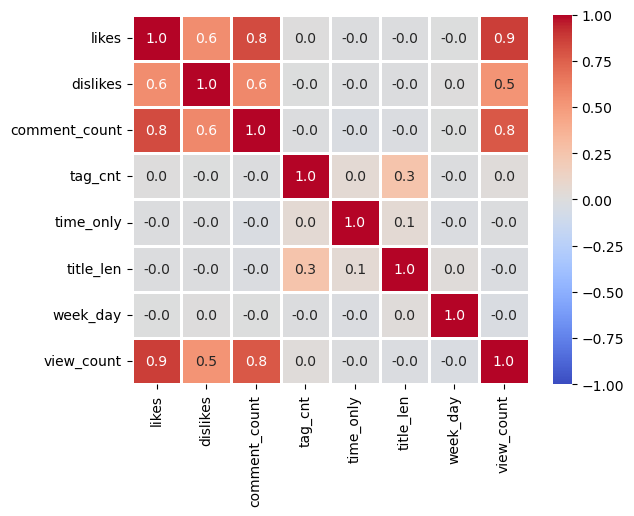

In [299]:
plt.figure()
sb.heatmap(data=view_corr, annot=True, fmt='.1f', cmap='coolwarm', linewidths=1.0, vmin= -1, vmax = 1)
plt.show()

In [ ]:
# 상관분석결과.
# 태그의 갯수, 올리는 시간, 제목의 길이, 올리는 날짜는 조회수와 아무런 관련이 없다
# 특이한것은 태그의 갯수가 많을수록 타이틀도 길게짓는 경향이 있는것으로 발견되었다.

In [ ]:
# 코멘트 갯수로 조회수를 맞춰보자 (못맞춘다.)

In [259]:
X = df1.loc[ : , ['likes','comment_count']]

In [260]:
X

,likes,comment_count
0,53326,139946
1,28244,3339
2,17974,50688
3,36893,8751
4,353337,23405
...,...,...
168549,9062,390
168550,9222,565
168551,29528,1258
168552,71846,3682


In [261]:
y= df1['view_count']

In [262]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168554 entries, 0 to 168553
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   likes          168554 non-null  int64
 1   comment_count  168554 non-null  int64
dtypes: int64(2)
memory usage: 2.6 MB


In [263]:
from sklearn.model_selection import train_test_split

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [265]:
from sklearn.linear_model import LinearRegression

In [266]:
regressor = LinearRegression()

In [267]:
regressor.fit(X_train, y_train)

LinearRegression()

In [268]:
y_pred = regressor.predict(X_test)

In [269]:
error = y_test - y_pred 

In [270]:
error ** 2

10351     7.215834e+11
103930    4.130635e+10
22869     2.002945e+11
10683     6.165738e+10
117425    5.022677e+10
              ...     
45390     9.443632e+11
93109     3.253314e+11
155677    8.826350e+11
167789    2.418417e+11
33806     2.952184e+11
Name: view_count, Length: 33711, dtype: float64

In [271]:
(error ** 2).mean()

9906598919873.006

In [272]:
y_test

10351     2200850
103930     727880
22869      379694
10683      723921
117425     936673
           ...   
45390      256273
93109      256733
155677    2188679
167789     416483
33806      266299
Name: view_count, Length: 33711, dtype: int64

In [273]:
y_pred

array([1351389.37619535,  931119.64901468,  827236.70440413, ...,
       1249192.45000887,  908257.00423711,  809639.01551961])

In [ ]:
# 오차가 너무난다 . 
# 카테고리별로 그룹화시켜서 어느카테고리가 인기있는지를 알아보자.

In [274]:
df1.head(1)

,title,publishedAt,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,tag_cnt,categori_name,time_only,week_day,title_len,week_day_name
0,안녕하세요 보겸입니다,2020-08-09 09:32:48+00:00,보겸 BK,24,"[보겸, bokyem]",5947503,53326,105756,139946,0,2,엔터테인먼트,9,6,11,일


In [289]:
df1.groupby('categoryId')['view_count'].sum()

categoryId
1       6138416513
2       1497265478
10    120825496957
15      2402702622
17     14893197471
19      2522797439
20      8211548092
22     24914439914
23     13850706632
24     72452650536
25      9490818769
26      5282097292
27      2862508710
28      4645897099
29       208231823
Name: view_count, dtype: int64

In [310]:
df1.to_csv('youtube_trend.csv', index=False)

In [311]:
df1.shape

(168554, 16)

In [315]:
df1['categori_name'].value_counts().to_frame()

,categori_name
엔터테인먼트,58711
사람 및 블로그,27041
음악,18760
스포츠,12782
코미디,10694
뉴스 및 정치,7558
하우투 및 스타일,7248
게임,6434
영화 및 애니메이션,5003
애완 동물 및 동물,3255


In [316]:
df1.head(1)

,title,publishedAt,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,tag_cnt,categori_name,time_only,week_day,title_len,week_day_name
0,안녕하세요 보겸입니다,2020-08-09 09:32:48+00:00,보겸 BK,24,"[보겸, bokyem]",5947503,53326,105756,139946,0,2,엔터테인먼트,9,6,11,일


In [406]:
my_list = '제목,올린날짜,채널이름,카테고리,태그,조회수,좋아요,싫어요,댓글수,상세내용작성여부,태그수,카테고리이름,올린시간,숫자요일,제목의길이,글자요일'

In [407]:
my_list= my_list.split(",")

In [405]:
my_list= np.array(my_list)

In [351]:
my_list = pd.Series(my_list)

In [355]:
my_list = my_list.to_frame()

In [408]:
my_list

['제목',
 '올린날짜',
 '채널이름',
 '카테고리',
 '태그',
 '조회수',
 '좋아요',
 '싫어요',
 '댓글수',
 '상세내용작성여부',
 '태그수',
 '카테고리이름',
 '올린시간',
 '숫자요일',
 '제목의길이',
 '글자요일']

In [358]:
my_list = df1.columns+" : " +my_list

ValueError: Unable to coerce to Series, length must be 1: given 16

In [399]:
my_list2 = df1.columns

In [366]:
my_list2['컬럼설명']=my_list

In [372]:
my_list2 = my_list2.reset_index()

In [402]:
my_list

,index,0,0
0,title,title,제목
1,publishedAt,publishedAt,올린날짜
2,channelTitle,channelTitle,채널이름
3,categoryId,categoryId,카테고리
4,tags,tags,태그
5,view_count,view_count,조회수
6,likes,likes,좋아요
7,dislikes,dislikes,싫어요
8,comment_count,comment_count,댓글수
9,description,description,상세내용작성여부


In [410]:
my_list2 = list(my_list2)

In [385]:
my_list = pd.concat([my_list2,my_list], axis=1)

In [411]:
my_list

['제목',
 '올린날짜',
 '채널이름',
 '카테고리',
 '태그',
 '조회수',
 '좋아요',
 '싫어요',
 '댓글수',
 '상세내용작성여부',
 '태그수',
 '카테고리이름',
 '올린시간',
 '숫자요일',
 '제목의길이',
 '글자요일']

In [412]:
my_list2

['title',
 'publishedAt',
 'channelTitle',
 'categoryId',
 'tags',
 'view_count',
 'likes',
 'dislikes',
 'comment_count',
 'description',
 'tag_cnt',
 'categori_name',
 'time_only',
 'week_day',
 'title_len',
 'week_day_name']

In [440]:
my_list3 = []
for i in range(len(my_list)):
    my_list3.append( my_list2[i]+" : "+my_list[i])
my_list3

['title : 제목',
 'publishedAt : 올린날짜',
 'channelTitle : 채널이름',
 'categoryId : 카테고리',
 'tags : 태그',
 'view_count : 조회수',
 'likes : 좋아요',
 'dislikes : 싫어요',
 'comment_count : 댓글수',
 'description : 상세내용작성여부',
 'tag_cnt : 태그수',
 'categori_name : 카테고리이름',
 'time_only : 올린시간',
 'week_day : 숫자요일',
 'title_len : 제목의길이',
 'week_day_name : 글자요일']

In [ ]:
['제목 : title',
 '올린날짜 : publishedAt',
 '채널이름 : channelTitle',
 '카테고리 : categoryId',
 '태그 : tags',
 '조회수 : view_count',
 '좋아요 : likes',
 '싫어요 : dislikes',
 '댓글수 : comment_count',
 '상세내용작성여부 : description',
 '태그수 : tag_cnt',
 '카테고리이름 : categori_name',
 '올린시간 : time_only',
 '숫자요일 : week_day',
 '제목의길이 : title_len',
 '글자요일 : week_day_name']

In [443]:
pd.DataFrame(my_list3)

,0
0,title : 제목
1,publishedAt : 올린날짜
2,channelTitle : 채널이름
3,categoryId : 카테고리
4,tags : 태그
5,view_count : 조회수
6,likes : 좋아요
7,dislikes : 싫어요
8,comment_count : 댓글수
9,description : 상세내용작성여부


In [427]:
list(map(lambda s : '\n'.join(s.split()), my_list3))


['제목\n:\ntitle',
 '올린날짜\n:\npublishedAt',
 '채널이름\n:\nchannelTitle',
 '카테고리\n:\ncategoryId',
 '태그\n:\ntags',
 '조회수\n:\nview_count',
 '좋아요\n:\nlikes',
 '싫어요\n:\ndislikes',
 '댓글수\n:\ncomment_count',
 '상세내용작성여부\n:\ndescription',
 '태그수\n:\ntag_cnt',
 '카테고리이름\n:\ncategori_name',
 '올린시간\n:\ntime_only',
 '숫자요일\n:\nweek_day',
 '제목의길이\n:\ntitle_len',
 '글자요일\n:\nweek_day_name']

In [439]:
pd.Series(my_list3)

0                 제목 : title
1         올린날짜 : publishedAt
2        채널이름 : channelTitle
3          카테고리 : categoryId
4                  태그 : tags
5           조회수 : view_count
6                좋아요 : likes
7             싫어요 : dislikes
8        댓글수 : comment_count
9     상세내용작성여부 : description
10             태그수 : tag_cnt
11    카테고리이름 : categori_name
12          올린시간 : time_only
13           숫자요일 : week_day
14         제목의길이 : title_len
15      글자요일 : week_day_name
dtype: object